<a href="https://colab.research.google.com/github/rishisubedi/Data_Analysis_Projects/blob/master/Portugese_banking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portugese Bank Data Analysis

Using the ADM techniques, this notebook will run individual experiments to find a solution providing the best accuracy of predicting client profiles on the bank marketing used for designing a solution.

In [ ]:
install.packages("caret")
install.packages("e1071")
install.packages("ROCR")
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("xlsx")
#install package of artificial Neural Network
install.packages("neuralnet")
install.packages("corrplot")
#installing the package of gradient Boosting Machine
install.packages("gbm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## Importing packages
library(tidyverse) # metapackage with lots of helpful data analysis functions
library(data.table) 
library(readr)
library(readxl)
library(ggplot2)
library(caret)
library(rpart)
library(e1071)
library(xlsx)
library(ROCR)
library(neuralnet)
library(corrplot)
library(Metrics)
library(gbm)

Loaded gbm 2.1.8



In [ ]:
bank <- read_excel('/content/bank-additional-full.xlsx')

In [ ]:
head(bank)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [ ]:
str(bank)

tibble[,21] [41,188 × 21] (S3: tbl_df/tbl/data.frame)
 $ age           : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ marital       : chr [1:41188] "married" "married" "married" "married" ...
 $ education     : chr [1:41188] "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr [1:41188] "no" "unknown" "no" "no" ...
 $ housing       : chr [1:41188] "no" "no" "yes" "no" ...
 $ loan          : chr [1:41188] "no" "no" "no" "no" ...
 $ contact       : chr [1:41188] "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr [1:41188] "may" "may" "may" "may" ...
 $ day_of_week   : chr [1:41188] "mon" "mon" "mon" "mon" ...
 $ duration      : num [1:41188] 261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : num [1:41188] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : num [1:41188] 999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : num [1:41188] 0 0 0 0 

#Data Exploration

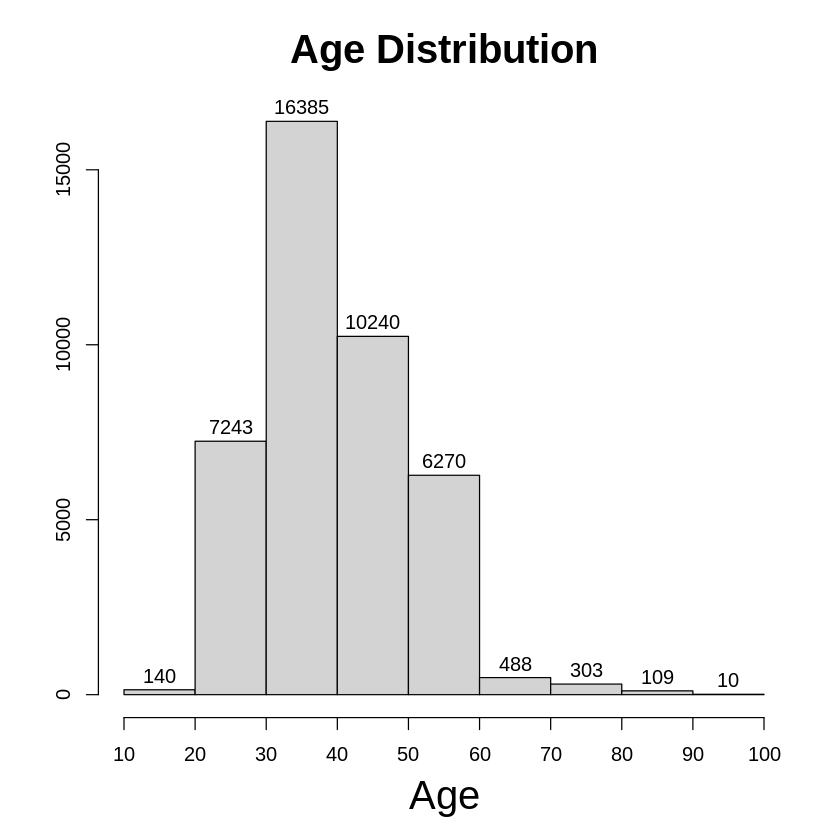

In [ ]:
bank$tk<-1 
#ggplot package

#a. Age Distribution
hist(bank$age,breaks=seq(10,100,by=10),axes=F,ann=F,labels=T)
axis(1,at=seq(10,100,10))
axis(2,ylim=c(0,20100))
title(xlab="Age",cex.lab=2)
title(main="Age Distribution",cex.main=2)

As from above plot, we can find out that there are more people with the age of the 30-40 years.

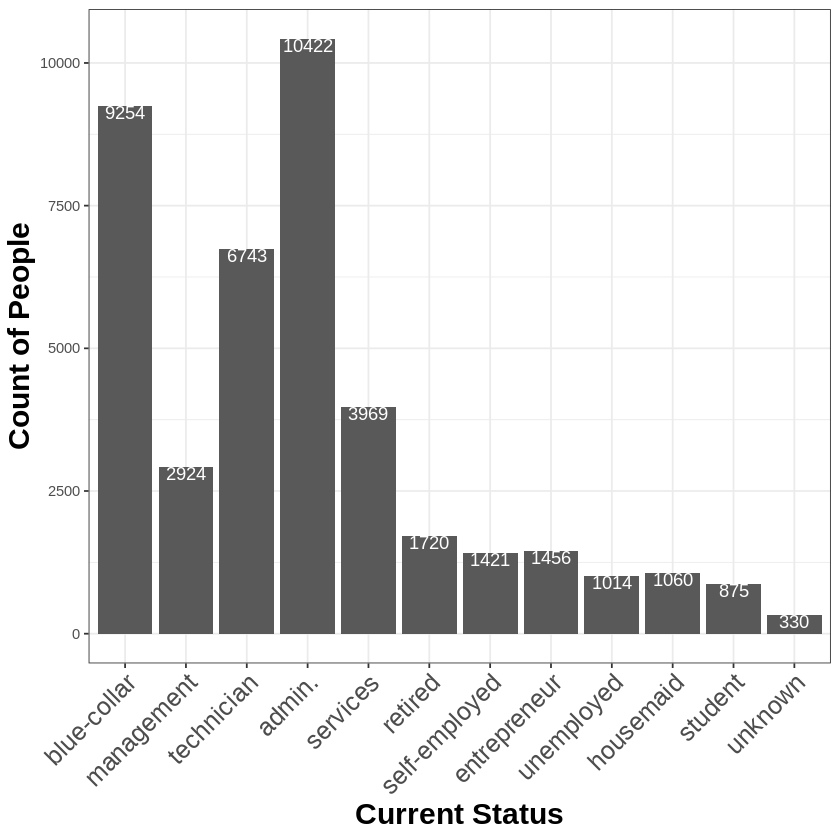

In [ ]:
h<-ggplot(bank, aes(x=job)) +geom_bar() + theme_bw() + theme(axis.text.x=element_text(angle=45, hjust=1,size=15)) 
h2<-h+scale_x_discrete(limits=c("blue-collar","management","technician","admin.","services","retired","self-employed","entrepreneur","unemployed","housemaid","student","unknown"))
#h3<-h2+ ggtitle("Distribution of people by their current status") + theme(plot.title = element_text(family = "serif", face = "bold", hjust = 0.5, size = 18, color = "black")) 
h3 <- h2 + geom_text(aes(label=..count..), stat="count", vjust=1.0, colour="white")
h3+ labs(x="Current Status", y="Count of People")+theme(axis.title = element_text(face = "bold", size = 18, color = "black")) 

From above, the dataset contain most of the people currently doing adminstration jobs followed by the blue-collar jobs.


divorced  married   single  unknown 
    4612    24928    11568       80 

          
                  no       yes
  divorced 0.8967910 0.1032090
  married  0.8984275 0.1015725
  single   0.8599585 0.1400415
  unknown  0.8500000 0.1500000

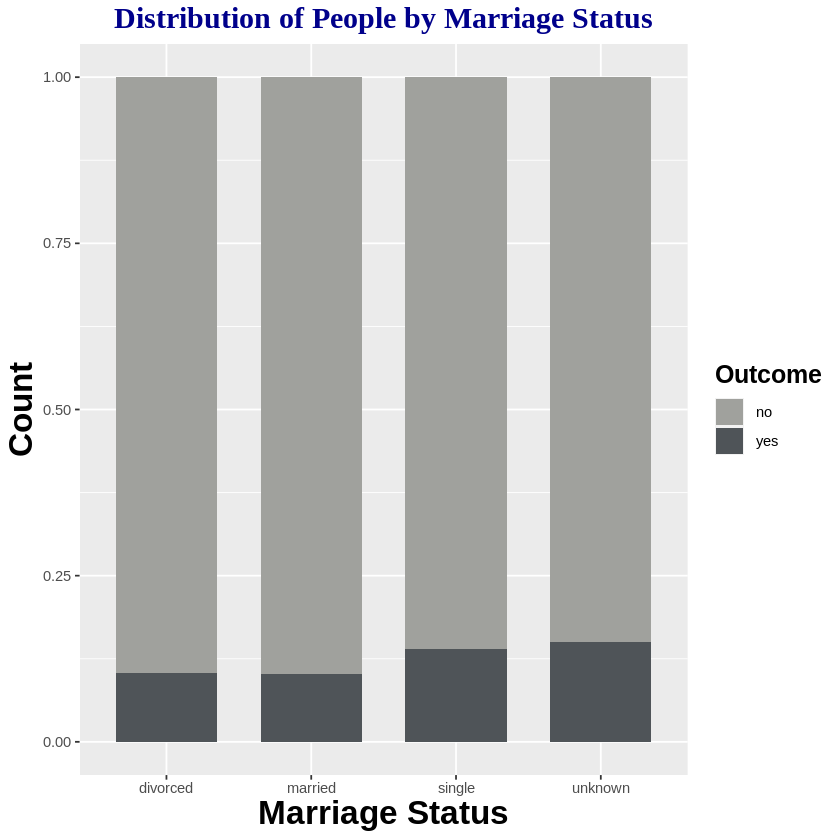

In [ ]:
table(bank$marital)
prop.table( table(bank$marital,bank$y),1)
bar<-ggplot(bank, aes(x=marital,y=tk, fill=y))
bar2<-bar+geom_bar(stat="identity", position="fill", width=0.7)
bar3<-bar2 + ggtitle("Distribution of People by Marriage Status") + theme(plot.title = element_text(family = "serif", face = "bold", hjust = 0.5, size = 18, color = "darkblue")) 
bar4<-bar3+labs(x="Marriage Status", y="Count")+theme(axis.title = element_text(face = "bold", size = 20)) 
bar5<-bar4+labs(fill="Outcome")+theme(legend.title=element_text(face = "bold", size = 15))
bar6<-bar5+geom_text(x=1, y=0.03, label="0.1194", alpha=.1)+geom_text(x=2, y=0.03, label="0.1012", alpha=.1) +geom_text(x=3, y=0.03, label="0.1494", alpha=.1) 
bar5+scale_fill_manual(values=c("#A0A19D", "#4F5458"))

From above, we can also infer that the single people are more likely to say "Yes" the term deposit rather than the divorced and married people.


married  single unknown 
  24928   16180      80 

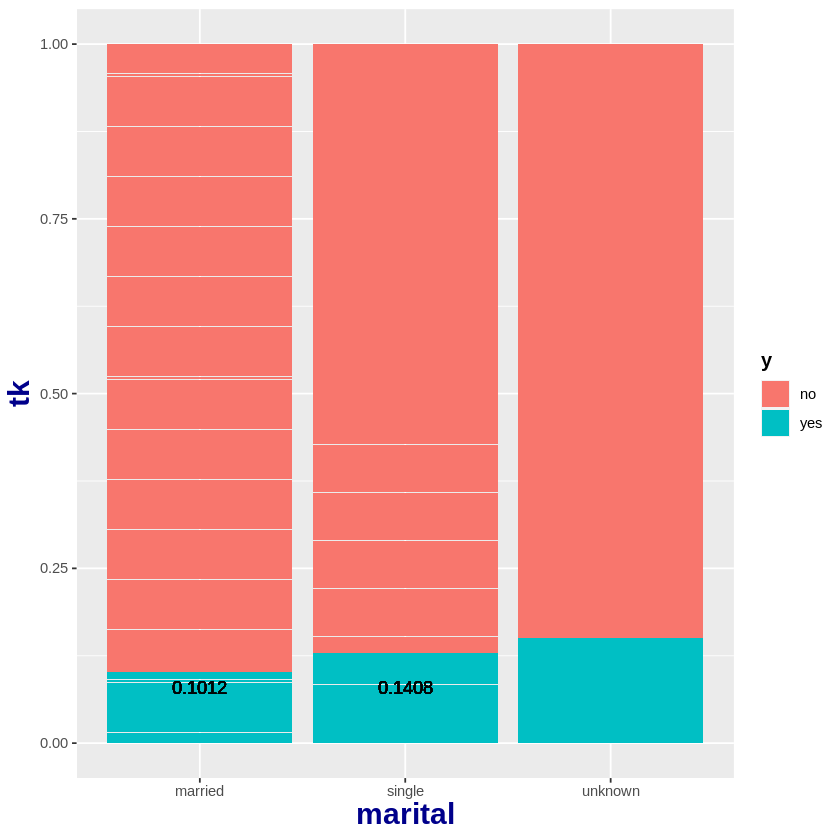

In [ ]:
bank2<-bank
bank2[bank2$marital=="divorced",3]<-"single"
table(bank2$marital)
bar<-ggplot(bank2, aes(x=marital,y=tk, fill=y))
bar2<-bar+geom_bar(stat="identity", position="fill")
bar3<-bar2 + theme(plot.title = element_text(family = "serif", face = "bold", hjust = 0.5, size = 18, color = "darkblue")) 
bar4<-bar3+theme(axis.title = element_text(face = "bold", size = 18, color = "darkblue")) 
bar5<-bar4+theme(legend.title=element_text(face = "bold", size = 12, color = "black"))
bar5 +geom_text(x=1, y=0.08, label="0.1012", alpha=.1) +geom_text(x=2, y=0.08, label="0.1408", alpha=.1) 

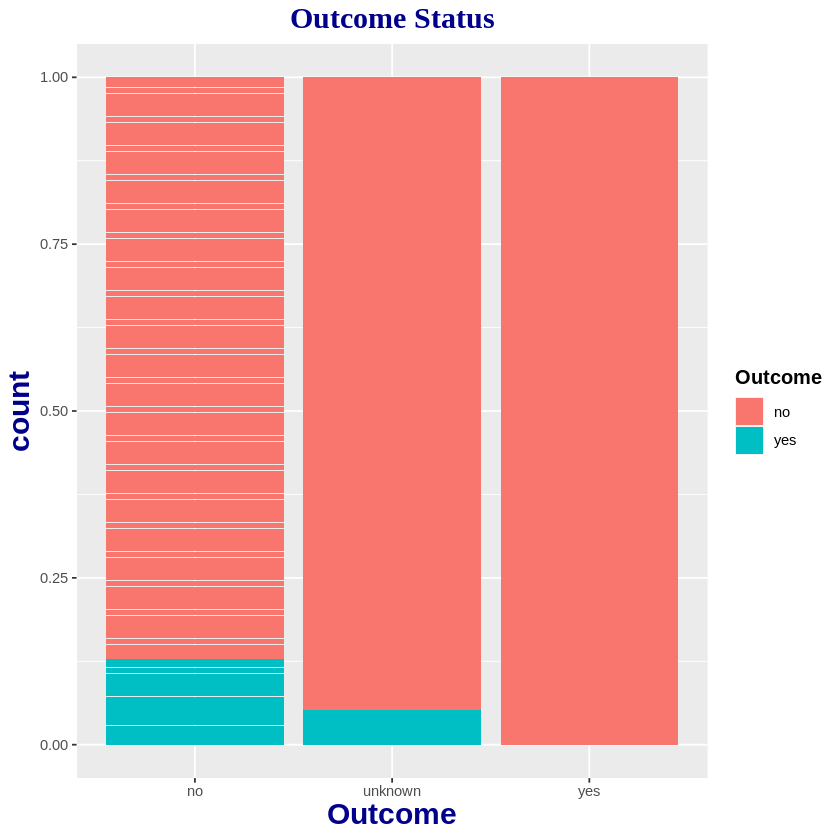

In [ ]:
bar<-ggplot(bank, aes(x=default,y=tk, fill=y))
bar2<-bar+geom_bar(stat="identity", position="fill")
bar3<-bar2 + ggtitle("Outcome Status") + theme(plot.title = element_text(family = "serif", face = "bold", hjust = 0.5, size = 18, color = "darkblue")) 
bar4<-bar3+labs(x="Outcome", y="count")+theme(axis.title = element_text(face = "bold", size = 18, color = "darkblue"))
bar4+labs(fill="Outcome")+theme(legend.title=element_text(face = "bold", size = 12, color = "black"))

1%   2.5%     5%    10%    25%    50%    75%    90%    95%  97.5%    99% 
4963.6 4991.6 5017.5 5076.2 5099.1 5191.0 5228.1 5228.1 5228.1 5228.1 5228.1

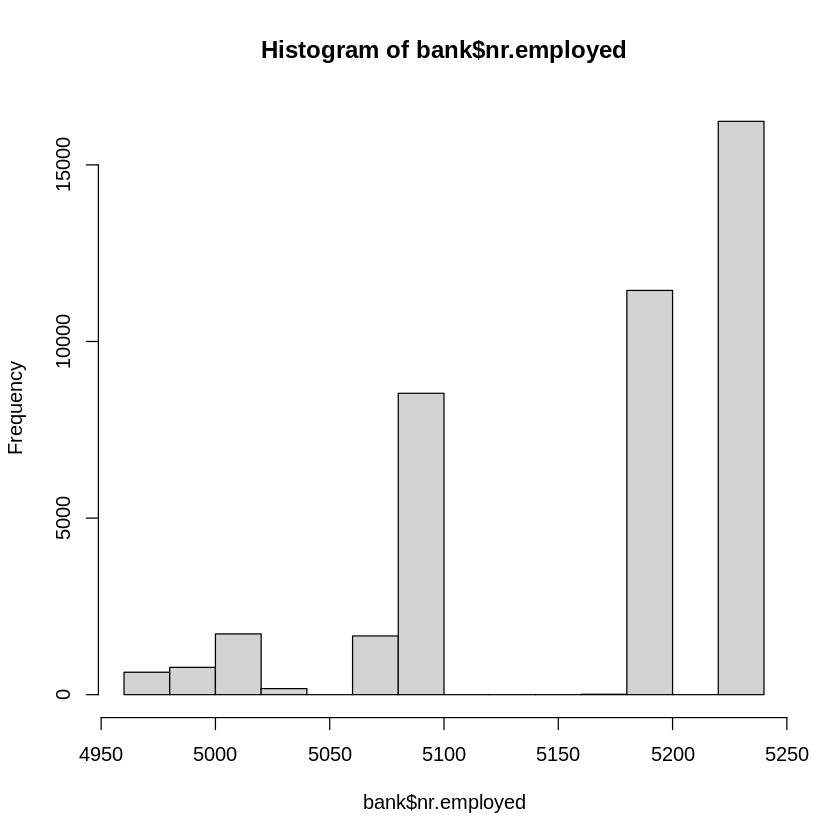

In [ ]:
#f. 
hist(bank$nr.employed)
quantile(bank$nr.employed, probs=c(0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95,0.975,0.99))


     no unknown     yes 
  33950     990    6248 

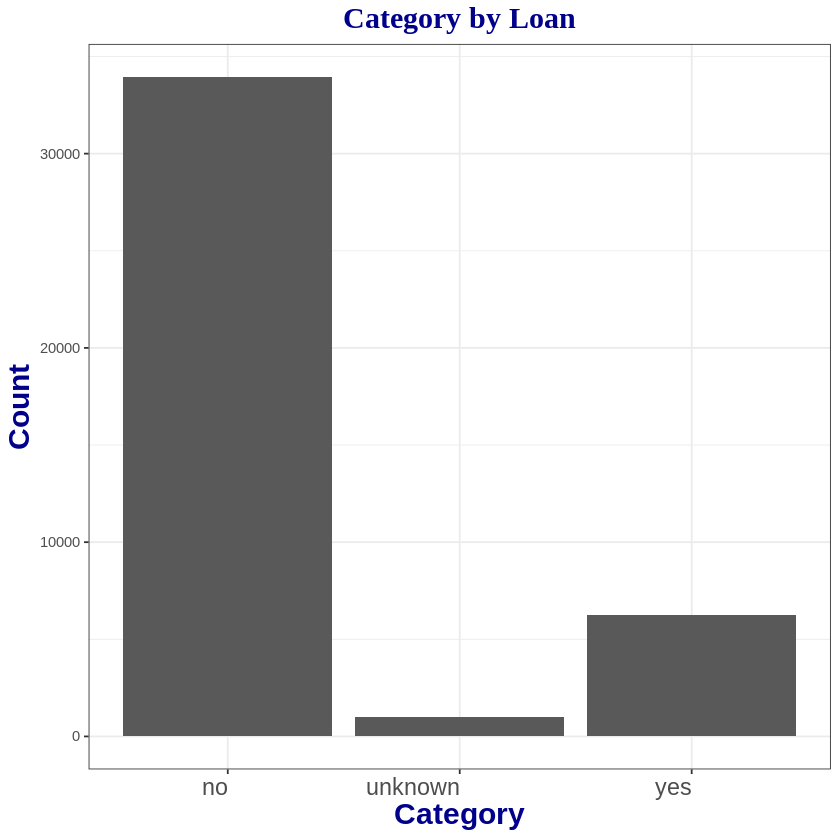

In [ ]:
#h. loan
table(bank$loan)
e2<-ggplot(bank, aes(x=loan)) +geom_bar() + theme_bw() + theme(axis.text.x=element_text(angle=0, hjust=1,size=14)) 
e3<-e2 + ggtitle("Category by Loan") + theme(plot.title = element_text(family = "serif", face = "bold", hjust = 0.5, size = 18, color = "darkblue")) 
e3+labs(x="Category", y="Count")+theme(axis.title = element_text(face = "bold", size = 18, color = "darkblue"))


 cellular telephone 
    26144     15044 

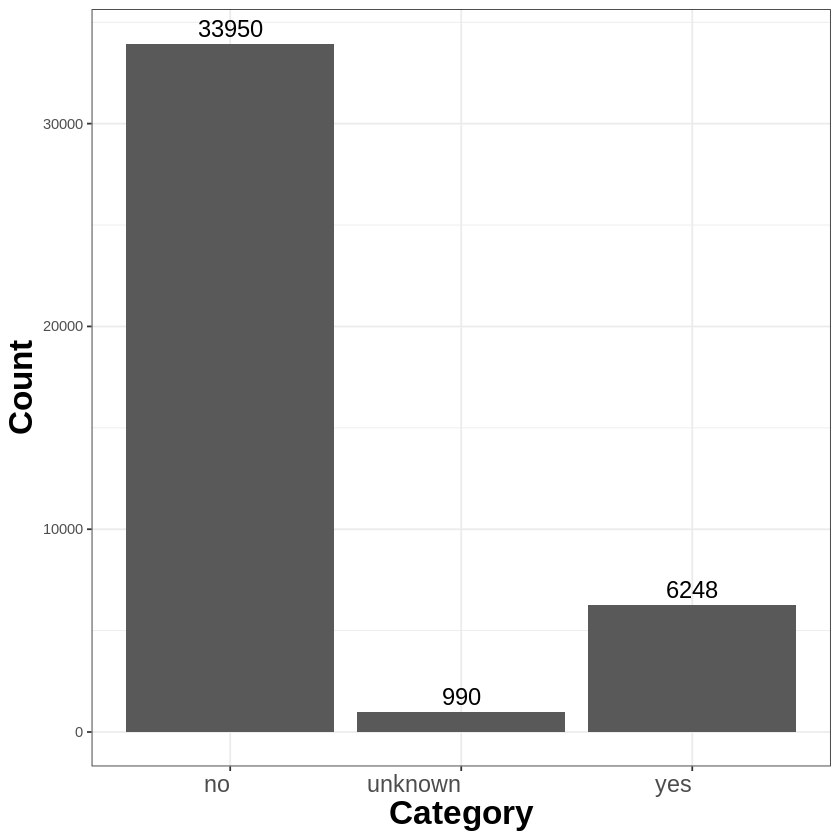

In [ ]:
#i. contact
table(bank$contact)
e4<-e2+labs(x="Category", y="Count")+theme(axis.title = element_text(face = "bold", size = 20, color = "black"))
e4+geom_text(aes(label=..count..), stat="count", vjust=-0.4, colour="black", size=5)

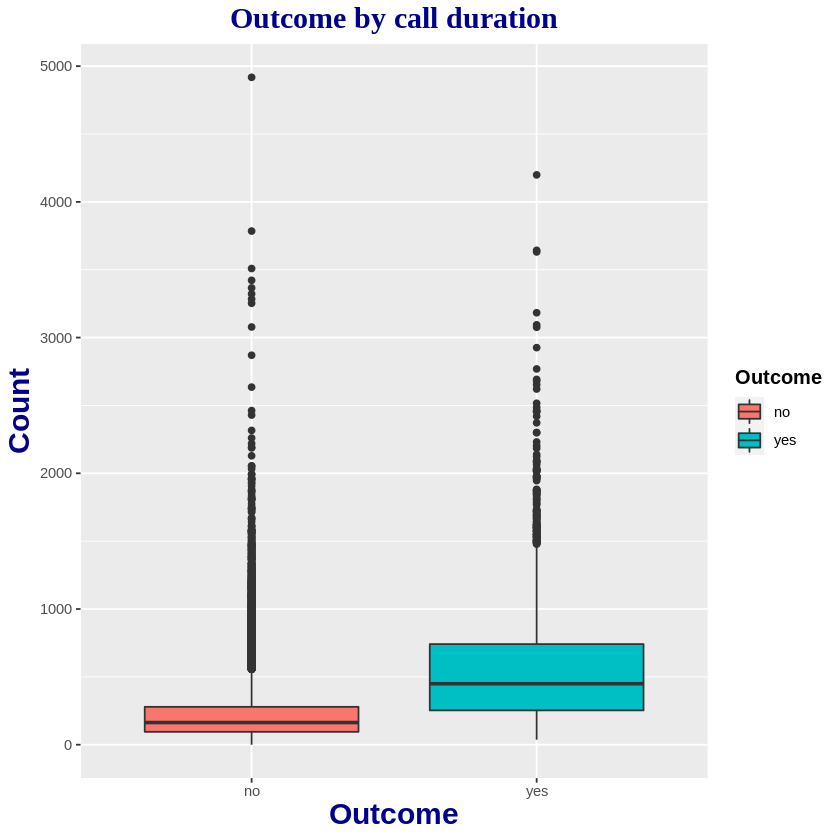

In [ ]:
#k. duration
box2<-ggplot(bank,aes(x=y,y=duration,fill=y))+geom_boxplot()
box3<-box2 + ggtitle("Outcome by call duration") + theme(plot.title = element_text(family = "serif", face = "bold", hjust = 0.5, size = 18, color = "darkblue")) 
box4<-box3+labs(x="Outcome", y="Count")+theme(axis.title = element_text(face = "bold", size = 18, color = "darkblue"))
box4+labs(fill="Outcome")+theme(legend.title=element_text(face = "bold", size = 12, color = "black"))

             
                 no   yes
  failure      3647   605
  nonexistent 32422  3141
  success       479   894

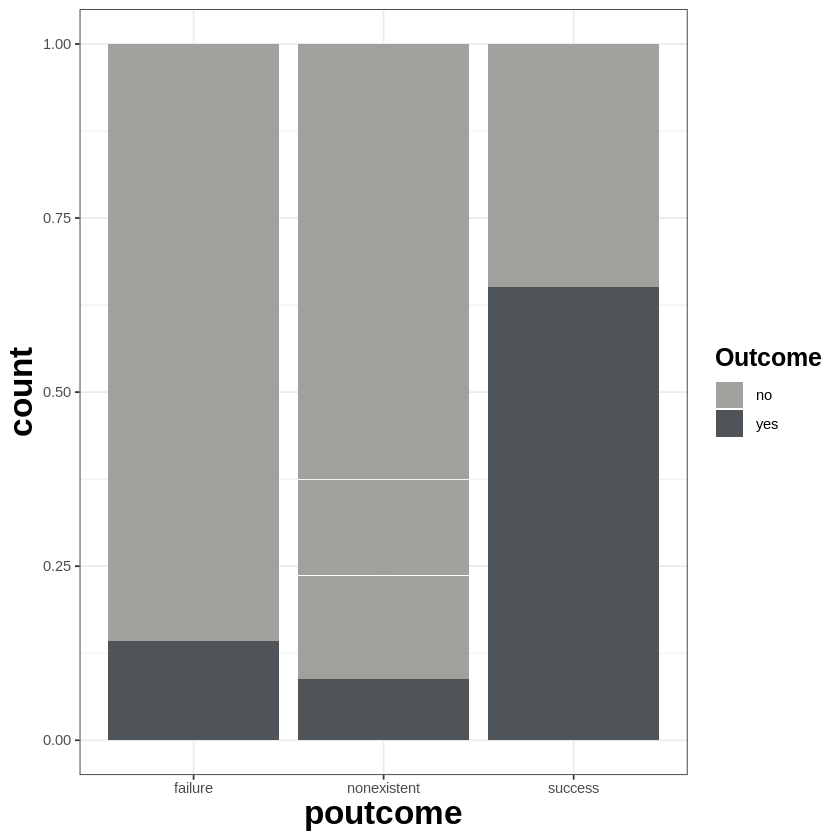

In [ ]:
#poutcome
table(bank$poutcome,bank$y)
bar<-ggplot(bank, aes(x=poutcome,y=tk, fill=y))
bar2<-bar+geom_bar(stat="identity", position="fill") 
bar3<-bar2+theme_bw()
bar4<-bar3+labs(x="poutcome", y="count")+theme(axis.title = element_text(face = "bold", size = 20, color = "black"))
bar5<-bar4+labs(fill="Outcome")+theme(legend.title=element_text(face = "bold", size = 15, color = "black"))
bar5+scale_fill_manual(values=c("#A0A19D", "#4F5458"))

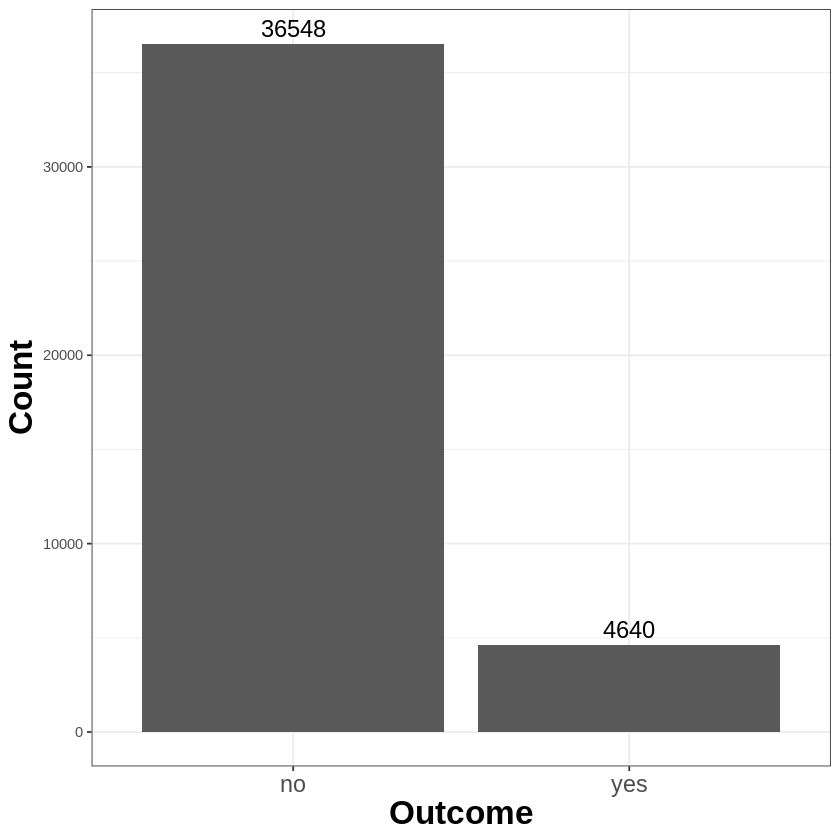

In [ ]:
#p. ### y (outcome)
e2<-ggplot(bank, aes(x=y)) +geom_bar() + theme_bw() + theme(axis.text.x=element_text(size=14))  
e4<-e2+labs(x="Outcome", y="Count")+theme(axis.title = element_text(face = "bold", size = 20, color = "black"))
e4+geom_text(aes(label=..count..), stat="count", vjust=-0.4, colour="black", size=5)

##Data Validation

In [ ]:

bank<-bank[,-9]

bank<-bank[(bank$pdays==-1 & bank$poutcome=="unknown") | (bank$pdays!=-1 & bank$poutcome!="unknown") ,]

bank<-bank[bank$education!="primary" | bank$job!="student",] 


bank<-bank[ bank$age>39 | bank$job!="retired",] 

#c3. campaign
quantile(bank$campaign, probs=c(0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95,0.975,0.99),na.rm=TRUE)
bank<-bank[bank$campaign<=16,]

1%  2.5%    5%   10%   25%   50%   75%   90%   95% 97.5%   99% 
    1     1     1     1     1     2     3     5     7    10    14

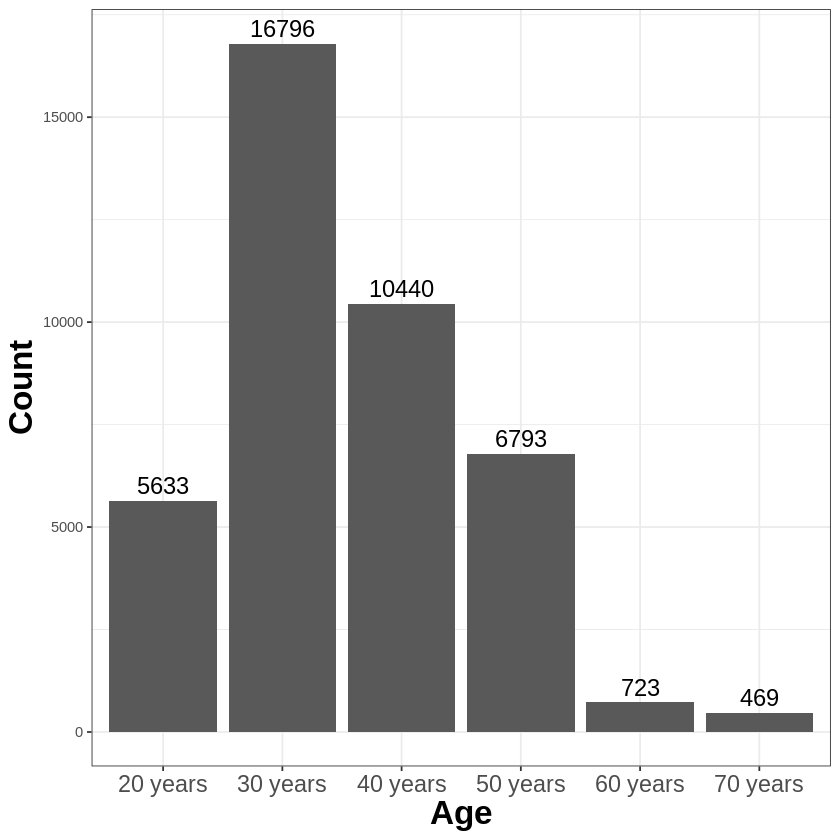

In [ ]:
bank$age2<-"-01"
bank[bank$age<=29,"age2"]<-"20 years"
bank[bank$age>=30 & bank$age<=39,"age2"]<-"30 years"
bank[bank$age>=40 & bank$age<=49,"age2"]<-"40 years"
bank[bank$age>=50 & bank$age<=59,"age2"]<-"50 years"
bank[bank$age>=60 & bank$age<=69,"age2"]<-"60 years"
bank[bank$age>=70,"age2"]<-"70 years"
bank$age<-as.factor(bank$age2)
bank<-bank[,-17]

e2<-ggplot(bank, aes(x=age2)) +geom_bar() + theme_bw() + theme(axis.text.x=element_text(size=14)) 
e3<-e2 + ggtitle("Age Distribution") + theme(plot.title = element_text(family = "serif", face = "bold", hjust = 0.5, size = 18, color = "darkblue")) 
e4<-e2+labs(x="Age", y="Count")+theme(axis.title = element_text(face = "bold", size = 20, color = "black"))
e4+geom_text(aes(label=..count..), stat="count", vjust=-0.4, colour="black", size=5)

###Data Normalization

In [ ]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
data <- bank[complete.cases(bank), ]
data <- data %>% select_if(is.numeric)
dfNorm <- as.data.frame(lapply(data, normalize))

In [ ]:
response=ifelse(bank$y=="yes",TRUE,FALSE)
dfNorm<- dfNorm %>% mutate(response)

In [ ]:
str(dfNorm)

'data.frame':	41188 obs. of  11 variables:
 $ age           : num  0.481 0.494 0.247 0.284 0.481 ...
 $ duration      : num  0.0531 0.0303 0.046 0.0307 0.0624 ...
 $ campaign      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pdays         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ previous      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ emp.var.rate  : num  0.938 0.938 0.938 0.938 0.938 ...
 $ cons.price.idx: num  0.699 0.699 0.699 0.699 0.699 ...
 $ cons.conf.idx : num  0.603 0.603 0.603 0.603 0.603 ...
 $ euribor3m     : num  0.957 0.957 0.957 0.957 0.957 ...
 $ nr.employed   : num  0.86 0.86 0.86 0.86 0.86 ...
 $ response      : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


###Random Sampling

Below we split the dataset into the training and the testing dataset.

In [ ]:
n = nrow(bank)
smp_size <- floor(0.8 * n) # 
set.seed(1116) 
index<- sample(seq_len(n),size = smp_size)
training <- dfNorm[index,]
testing <- dfNorm[-index,]

Below we will be selecting the best features from the dataset using the correlation map.

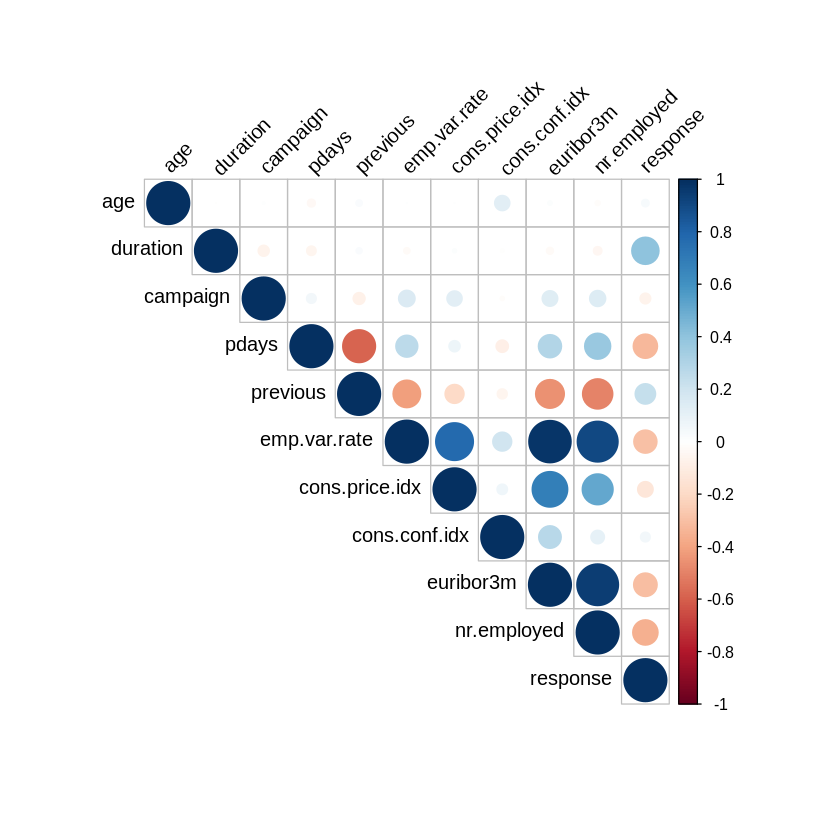

In [ ]:
corrTrain <- cor(training) # Select best 5 correlated values.
corrplot(corrTrain, type = "upper", tl.col = "black", tl.srt = 45)

For our training, we will be using `duration`, `campaign`, `pdays`, `previous`,`emp.var.rate`.

In [ ]:
bank_NN <- neuralnet(response ~ age + duration + campaign,
                     hidden=4,
                     data = training, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     likelihood = TRUE)

In [ ]:
bank_NN$result.matrix

error,8.565282e+03
reached.threshold,9.528812e-03
steps,8.124900e+04
aic,1.717256e+04
bic,1.734902e+04
Intercept.to.1layhid1,-1.603633e+00
age.to.1layhid1,1.316512e+00
duration.to.1layhid1,1.254132e+02
campaign.to.1layhid1,-2.012464e+01
Intercept.to.1layhid2,-2.543259e+00
age.to.1layhid2,1.589687e+00


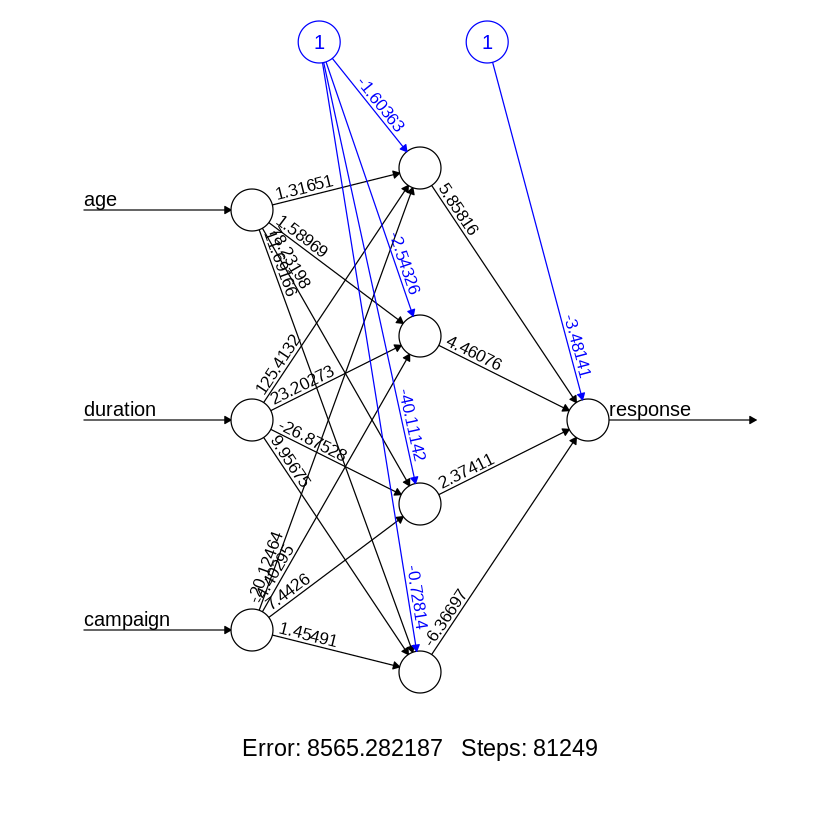

In [ ]:
plot(bank_NN, rep = 'best')


In [ ]:
#Test the resulting output
temp_test <- subset(testing, select = c("age","duration", "campaign", "response"))
head(temp_test)

,age,duration,campaign,response
,<dbl>,<dbl>,<dbl>,<lgl>
8,0.2962963,0.04412363,0,FALSE
20,0.2716049,0.03965026,0,FALSE
27,0.5185185,0.01891013,0,FALSE
28,0.2716049,0.04737698,0,FALSE
37,0.2098765,0.07421716,0,FALSE
38,0.4320988,0.33875559,0,FALSE


In [ ]:
predict_NN = compute(bank_NN, temp_test)
results <- data.frame(actual = temp_test$response, prediction = predict_NN$net.result)

In [ ]:
roresult<-sapply(results,round,digits=0)
roresultdf<-data.frame(roresult)
table(roresultdf$actual,roresultdf$prediction)

   
       0    1
  0 7157  159
  1  686  236

Our model correctly identify 7393 row of data while incorrectly identify 848 row of data which lead to the accuracy of 89.71%.

Therefore, our model has an accuracy of the 89.71% with the hidden layer of 3 which is quite accurate. 

##Gradient Boosting Algorithm

Gradient boosted machines (GBMs) are an extremely popular machine learning algorithm that have proven successful across many domains and is one of the leading methods for winning Kaggle competitions. Whereas random forests build an ensemble of deep independent trees, GBMs build an ensemble of shallow and weak successive trees with each tree learning and improving on the previous

Building a GBA Model

In [ ]:
set.seed(1116)
bank_gbm = gbm(response ~ age + duration + campaign + pdays + previous,
              data = training,
              distribution = "bernoulli",
              cv.folds = 3,
              shrinkage = .01,
              n.minobsinnode = 15,
              n.trees = 800)

In [ ]:
print(bank_gbm)

gbm(formula = response ~ age + duration + campaign + pdays + 
    previous, distribution = "bernoulli", data = training, n.trees = 800, 
    n.minobsinnode = 15, shrinkage = 0.01, cv.folds = 3)
A gradient boosted model with bernoulli loss function.
800 iterations were performed.
The best cross-validation iteration was 800.
There were 5 predictors of which 5 had non-zero influence.


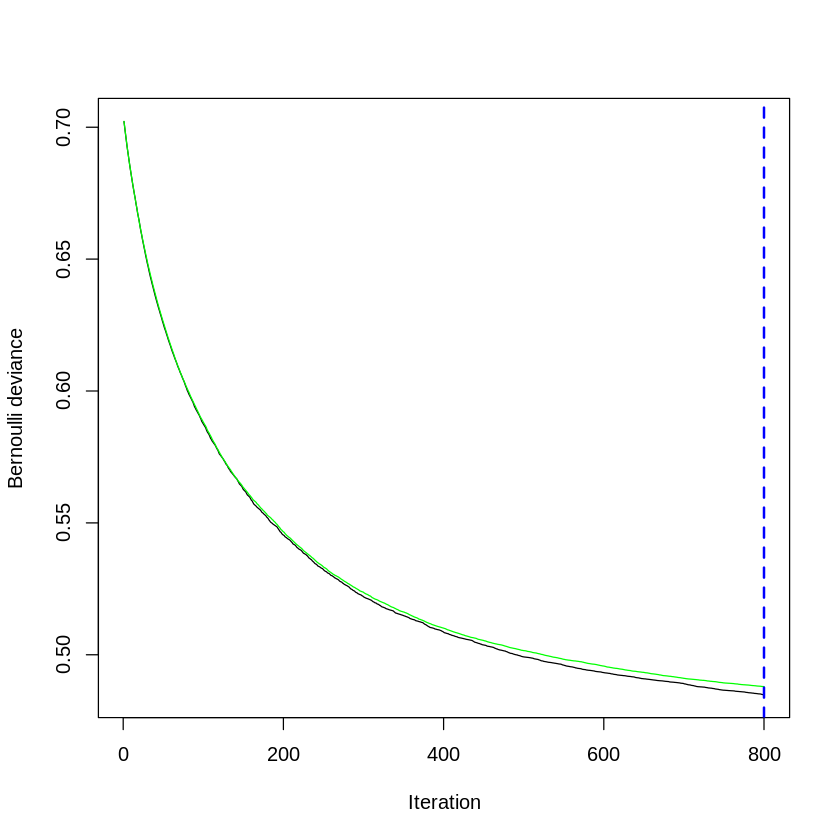

In [ ]:
n_tree_cv<-gbm.perf(bank_gbm,method="cv")

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



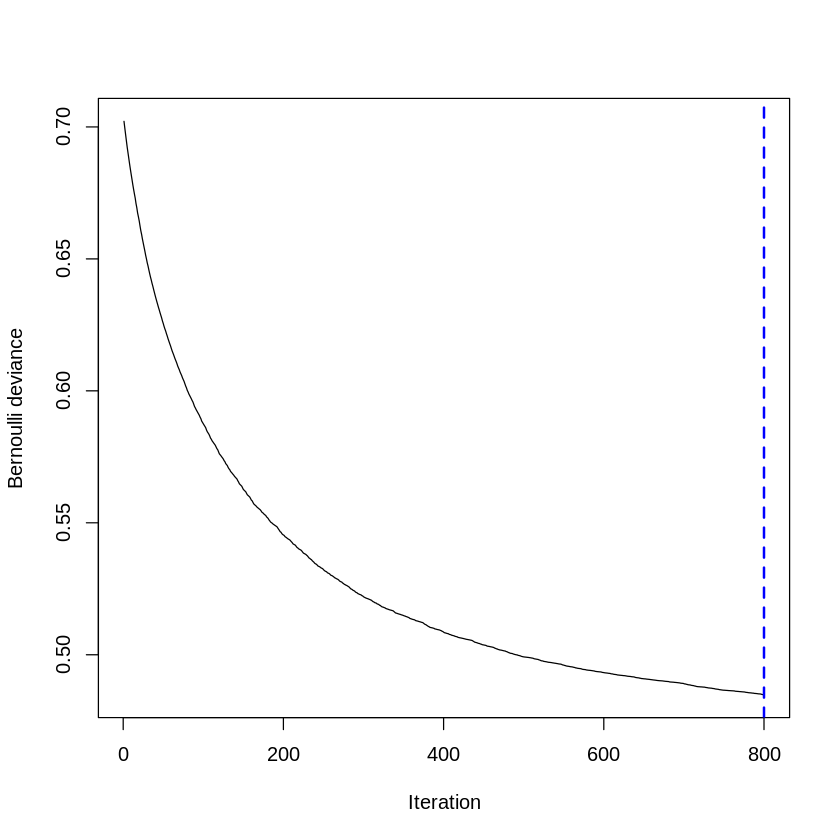

In [ ]:
n_tree_oob<-gbm.perf(bank_gbm,method="OOB")

In [ ]:
pred = predict.gbm(object = bank_gbm,
                   newdata = testing,
                   n.trees = 400,
                   type = "response")

In [ ]:
pred<-data.frame(pred)
head(pred)

,pred
,<dbl>
1,0.06802791
2,0.05858425
3,0.04290883
4,0.07477754
5,0.10028049
6,0.45044732


In [ ]:
#rounding the value
labels = as.logical(ifelse(pred>0.6,1,0))
result<- data.frame(testing$response,labels)
print(result)

In [ ]:
confusionMatrix(as.factor(testing$response), as.factor(labels))

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  7303   13
     TRUE    849   73
                                          
               Accuracy : 0.8954          
                 95% CI : (0.8886, 0.9019)
    No Information Rate : 0.9896          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1282          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.89585         
            Specificity : 0.84884         
         Pos Pred Value : 0.99822         
         Neg Pred Value : 0.07918         
             Prevalence : 0.98956         
         Detection Rate : 0.88650         
   Detection Prevalence : 0.88808         
      Balanced Accuracy : 0.87235         
                                          
       'Positive' Class : FALSE           
                     

The accuracy of the Gradient Boosting Machine model is 89.54% which is slightly better than the neural network model.